<a href="https://colab.research.google.com/github/game-addicted-man/2025DLP/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST
by uramoon@kw.ac.kr (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)

Fashion MNIST는 MNIST와 동일한 입출력 구조를 지니고 있으나 숫자 대신 의류의 종류를 예측합니다.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

0:	T-shirt/top
1:	Trouser
2:	Pullover
3:	Dress
4:	Coat
5:	Sandal
6:	Shirt
7:	Sneaker
8:	Bag
9:	Ankle boot

In [14]:
# 데이터셋 불러오기
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## TODO 1: 훈련 데이터 살펴보기

1. 훈련 데이터의 처음 세 장을 그려보세요.

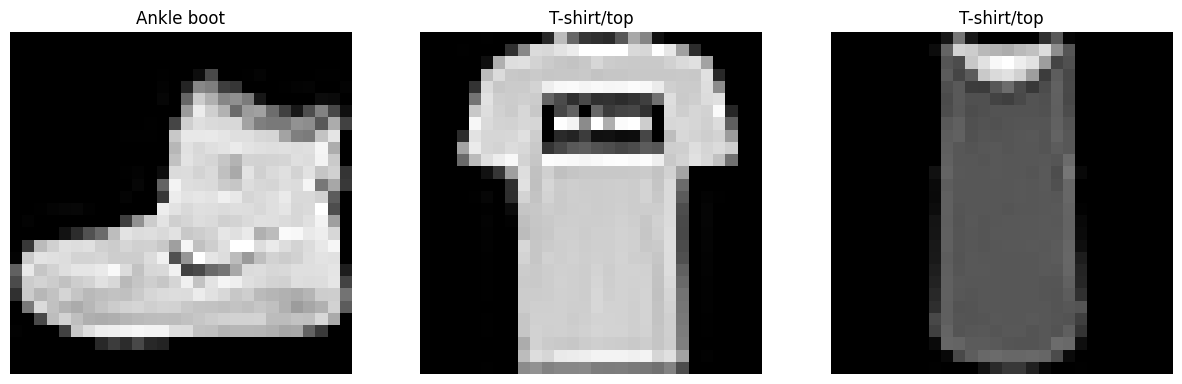

In [5]:
# TODO: 아래 빈 칸을 채우세요.
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 10))
for idx in range(3):
  plt.subplot(1, 3, idx+1)        # 행은 1개, 열은 3개, 몇 번째 그림을 그릴 것인지 기재 (1부터 시작하는 숫자)
  plt.imshow(train_images[idx], cmap='gray')  # 이미지 흑백으로 그리기
  plt.title(class_names[train_labels[idx]])                # 상기 class_names를 활용하여 그림 제목으로 정답(label)을 표시해보세요. 예: 숫자가 아닌 Shirt, Bag 등
  plt.axis('off')
plt.show()

## TODO 2: 데이터 전처리 (모양 바꾸기, 정규화, 레이블 변환[선택])
레이블 변환을 수행하지 않을 경우 TODO3의 loss에 'categorical_crossentropy' 대신 'sparse_categorical_crossentropy'를 사용해야 합니다.

In [15]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images / 255.0


## TODO 3: 모델 훈련 (모델 생성, compile, fit, evaluate)
테스트 데이터에 대해 88% 이상의 정확도를 보이는 모델을 만들어 보세요.

In [16]:
from keras import models
from keras import layers
# 모델 구성
network = models.Sequential()
network.add(layers.Input(shape=(28, 28, 1)))
network.add(layers.Flatten())
network.add(layers.Dense(1024, activation='relu'))
network.add(layers.Dropout(0.3))  # 과적합 방지용
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 모델 학습
network.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

# 모델 평가
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7562 - loss: 0.6744 - val_accuracy: 0.8555 - val_loss: 0.3926
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8543 - loss: 0.3932 - val_accuracy: 0.8728 - val_loss: 0.3546
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8677 - loss: 0.3541 - val_accuracy: 0.8662 - val_loss: 0.3531
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8802 - loss: 0.3252 - val_accuracy: 0.8667 - val_loss: 0.3701
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.8826 - loss: 0.3193 - val_accuracy: 0.8773 - val_loss: 0.3377
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8869 - loss: 0.3008 - val_accuracy: 0.8760 - val_loss: 0.3377
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8890 - loss: 0.2956 - val_accuracy: 0.8852 - val_loss: 0.3143
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8909 - loss: 0.2853 - 

## TODO 4: 틀린 예제 확인하기
TODO 3에서 만든 모델이 잘못 분류하는 그림을 테스트 데이터에서 하나 이상 찾아 그려보세요. <br>
(원래 레이블과 모델이 예측한 레이블은 그림 제목에 표시)

HInt: predict() 함수로 테스트 데이터에 대한 예측을 수행하고 예측값과 실제값을 비교하여 틀린 예제를 찾아내면 됩니다. predict() 함수는 test_images와 같이 여러 장의 그림이 저장된 배열 형태의 입력을 받습니다. [예: network.predict(test_images)]

https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict



predict() 함수는 첫 번째 그림에 대한 예측, 두 번째 그림에 대한 예측, ..., 마지막 그림에 대한 예측을 배열로 반환합니다. 각 예측은 [0번 클래스인 T-shirt일 확률, 1번 클래스인 Trouser일 확률, ..., 9번 클래스인 Ankle boot일 확률]의 모양을 지니고 있습니다. 이중 가장 큰 확률을 지닌 인덱스를 꺼내고 싶으면 np.argmax()함수에 넣어주면 됩니다.

https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

np.max() 함수는 배열에서 가장 큰 값을 반환하고 np.argmax() 함수는 배열에서 가장 큰 값을 지닌 인덱스를 반환하니 필요에 따라 잘 선택하여 사용합시다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
잘못 분류한 테스트 이미지 개수: 1196개


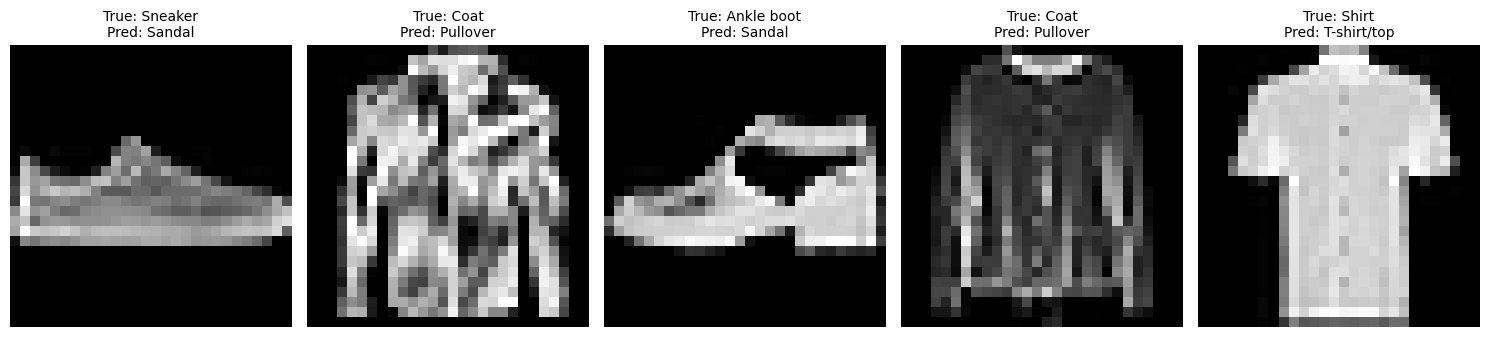

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 모델을 사용해 테스트 데이터 예측 (확률로 반환)
pred_probs = network.predict(test_images)

# 확률 중 가장 높은 인덱스를 예측 결과로 선택
pred_labels = np.argmax(pred_probs, axis=1)

# 실제 정답과 예측값이 다른 인덱스 추출
wrong_indices = np.where(pred_labels != test_labels)[0]

print(f"잘못 분류한 테스트 이미지 개수: {len(wrong_indices)}개")

# 오답 중 5개를 시각화
plt.figure(figsize=(15, 6))
for i in range(5):
    idx = wrong_indices[i]
    plt.subplot(1, 5, i + 1)
    # test_images는 (28, 28, 1)이므로 시각화를 위해 2D로 reshape
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    true_label = class_names[test_labels[idx]]
    predicted_label = class_names[pred_labels[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
